In [81]:
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [82]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()

In [83]:
len(X_train), X_train.shape

(60000, (60000, 28, 28))

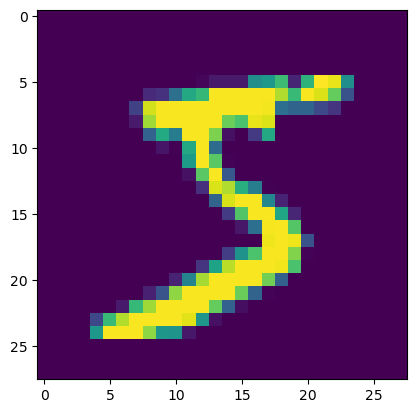

In [84]:
plt.imshow(X_train[0])

In [85]:
Y_train[0]

5

In [86]:
X_train = X_train/255
X_test = X_test/255

In [87]:
X_train_flatten = X_train.reshape(len(X_train), 28 * 28)
X_test_flatten = X_test.reshape(len(X_test), 28 * 28)

In [88]:
X_train_flatten.shape, X_test_flatten.shape

((60000, 784), (10000, 784))

In [89]:
model1 = Sequential([
    Dense(784, activation='relu', input_shape = (784, )),
    Dense(10, activation='sigmoid')
])

In [90]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [91]:
model1.fit(X_train_flatten, Y_train, epochs=10, validation_data=(X_test_flatten, Y_test))

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1910 - accuracy: 0.9447 - val_loss: 0.0935 - val_accuracy: 0.9700
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0756 - accuracy: 0.9771 - val_loss: 0.0672 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.0854 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.0706 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.0689 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0867 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0682 -

In [92]:
model1.evaluate(X_test_flatten, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0967 - accuracy: 0.9778


[0.09668231755495071, 0.9778000116348267]

In [93]:
Y_pred = model1.predict(X_test_flatten)

313/313 [==============================] - 2s 5ms/step


In [94]:
Y_pred[0]

array([2.3075788e-07, 1.0286807e-06, 1.3131865e-06, 1.4375013e-01,
       8.2776286e-10, 6.6616099e-06, 3.4993720e-13, 9.9999976e-01,
       1.0598345e-06, 7.7417299e-02], dtype=float32)

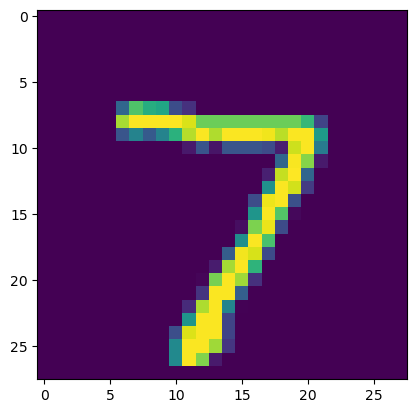

In [95]:
plt.imshow(X_test[0])

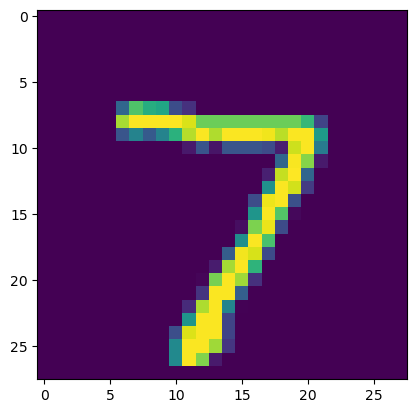

7


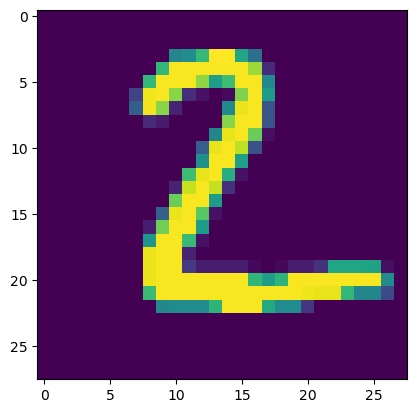

2


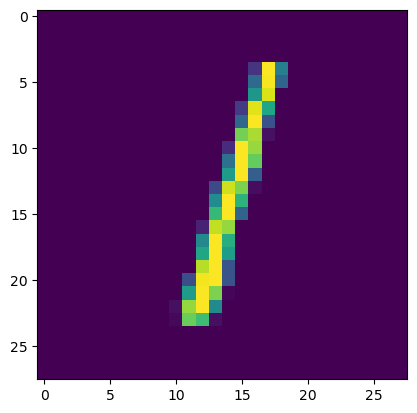

1


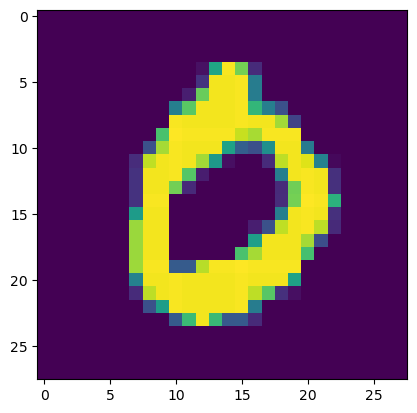

0


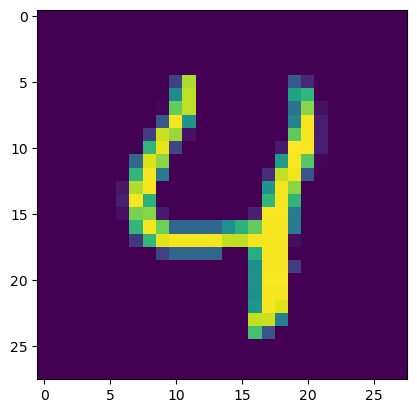

4


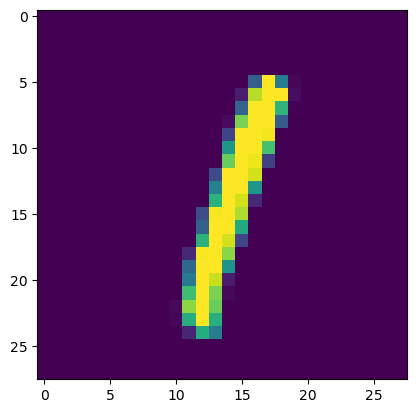

1


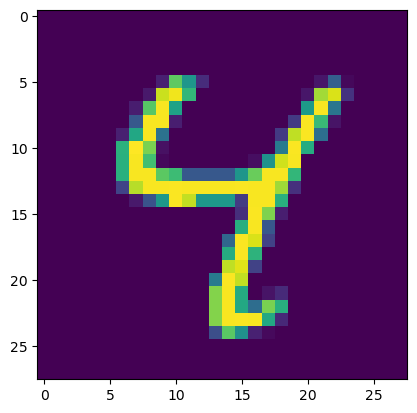

4


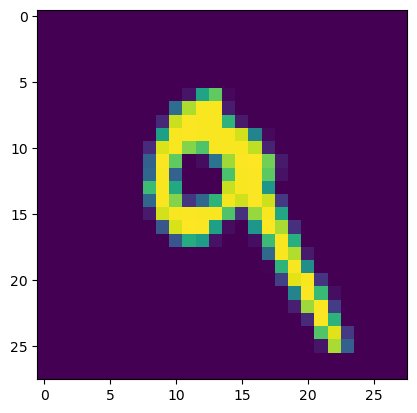

9


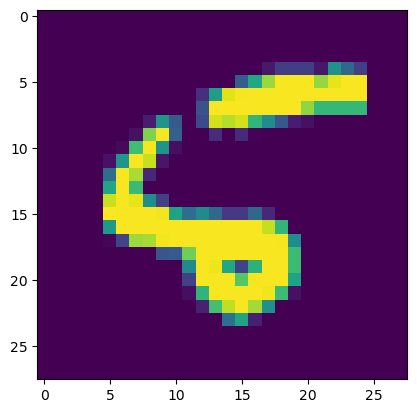

5


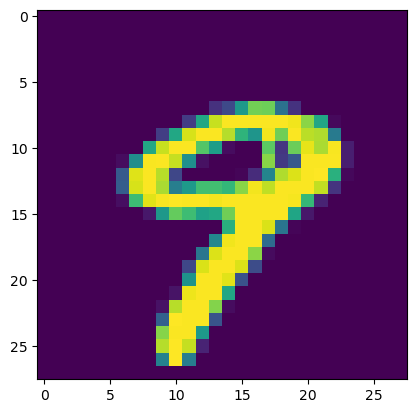

9


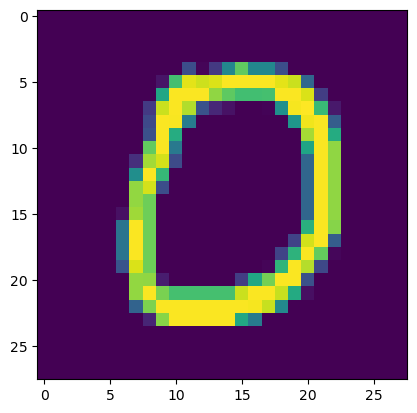

0


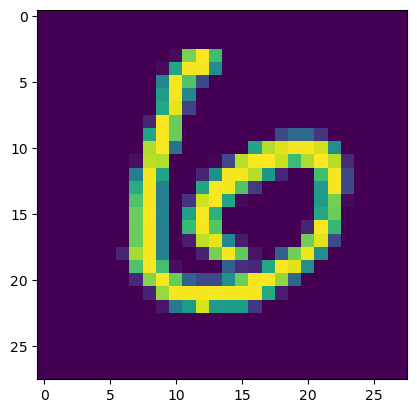

6


In [96]:
for i in range(12):
    plt.imshow(X_test[i])
    plt.show()
    print(np.argmax(Y_pred[i]))

In [97]:
Y_pred_int = [np.argmax(i) for i in Y_pred]

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

In [99]:
mt = confusion_matrix(Y_test, Y_pred_int)

In [100]:
print(classification_report(Y_test, Y_pred_int))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.96      0.98      0.97       982
           5       0.97      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.93      0.96      1028
           8       0.99      0.98      0.98       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 58.7222222222222, 'predicted')

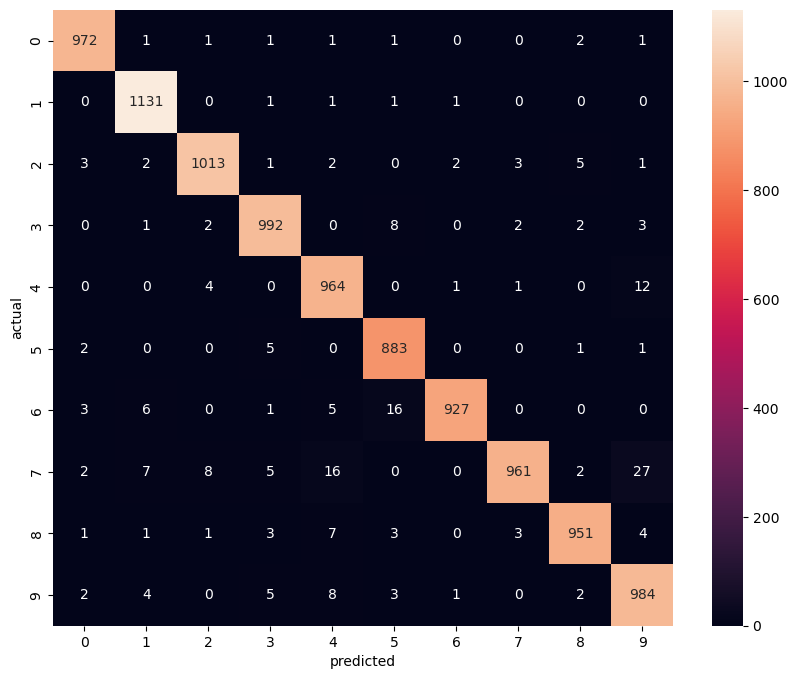

In [101]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(mt, annot=True, fmt='d')
plt.ylabel("actual")
plt.xlabel("predicted")

In [102]:
import pandas as pd
data = pd.DataFrame({"Predictions": Y_pred_int, "True": Y_test})

In [104]:
np.savetxt("Predictions.csv", data, fmt="%d")